# IA Paper 1 - Thermofluids - Examples paper 4

## Question 8: Plot volume and pressure graphs

Carbon dioxide (molecular mass = 44) behaves as a semi-perfect gas at moderate
pressures and temperatures. Over the temperature range 500$^{\circ}$C to 1200$^{\circ}$C, its constant
volume specific heat capacity is accurately represented by the linear relation:
 
$$
c_{v} = \alpha + \beta T
$$
 
where $\alpha$ = 555.65 J kg$^{-1}$ K and $\beta$ = 0.392 J kg$^{-1}$ K$^{-2}$. (Note that T is in Kelvin.)

A quantity of CO$_{2}$ undergoes a fully resisted expansion in an insulated cylinder. The initial pressure, volume and temperature are 0.3 MPa, 0.1 m$^{3}$ and 950$^{\circ}$C respectively, and at the end of the expansion the temperature has fallen to 600$^{\circ}$C.

(a) Calculate the mass of CO$_{2}$ in the cylinder.  

(b) Is the relationship $pv^{\gamma} = \text{const}$ valid for this process?

(c) Calculate the final volume and pressure, and the work done during the expansion.

(d) From your analysis for part (c), obtain a general expression for the volume in
terms of the temperature. Hence using `matplotlib`, create
plots of volume as a function of temperature and pressure as a function of volume.  
Find the value of n that fits $p_{1} v_{1}^{n} = p_{2} v_{2}^{n}$, where 1 and 2 denote the beginning and end of the expansion and use this to estimate the maximum error in pressure during the expansion if an expression of the form $pv^{n}= \text{const}.$ is assumed. 

### Solution

In [1]:
%matplotlib inline

Import all relevant modules. Here, we will need `NumPy` and `matplotlib`:

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

First introduce all the known variables, i.e. the constants $\alpha$ = 555.65 J kg$^{-1}$ K$^{-1}$, $\beta$ = 0.392 J kg$^{-1}$ K$^{-2}$ and $R_{CO_{2}}$ = 189.0 J kg$^{-1}$ K$^{-1}$, as well as the gas properties; mass m = 0.130 kg and the initial state $V_{1}$ = 0.1 m$^{3}$ and $T_{1}$ = 1223.15 K.

In [3]:
# Introduce the constants, remembering about designating the numbers as floats.
al = 555.65
bt = 0.392
R = 189.0

# Introduce the gas properties
m = 0.13
V1 = 0.1
T1 = 1223.15

From c) the general expression for V can be obtained as

$$V=V_{1} \left(\frac{T_{1}}{T} \right)^{\alpha/R} \exp \left(\frac{\beta (T_{1} - T)}{R} \right)$$

Using this result we can create an array of a range of temperatures between the initial and final state and the corresponding volume. 

In [4]:
# Create equally spaced temperature array
T = np.linspace(600, 950, 36)

# Calculate the corresponding volume array
V = V1*(T1/(T+273.15))**(al/R)*np.exp(bt*(T1-(T+273.15))/R)

# You can check that the code gives the correct final value for volume
print("V2 = {}".format(V[0]))

V2 = 0.5567330589697179


We can now create a plot of volume against temperature.

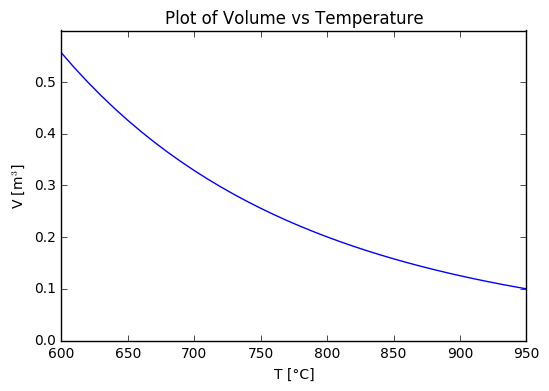

In [5]:
# Plot the graph using matplotlib
plt.plot(T, V)

# Add labels and title
plt.xlabel("T [°C]")
plt.ylabel("V [m$^3$]")
plt.title("Plot of Volume vs Temperature")

# Set limits for the y-axis to make it look better
plt.ylim([0.0, 0.6]);

Pressure can be related to volume by rearranging the ideal gas equation $pV = mRT$, giving $p = mRT/V$.

In [6]:
# The volume array has already been created as part of the previous part
# Now calaculate the cooresponding pressure array
p = m*R*(T + 273.15)/V

# You can check that the code gives the correct final value for pressure
print("p2 = {}".format(p[0]))

p2 = 38534.25830271541


We can now create the plot of pressure against volume, analogically to the previous plot.

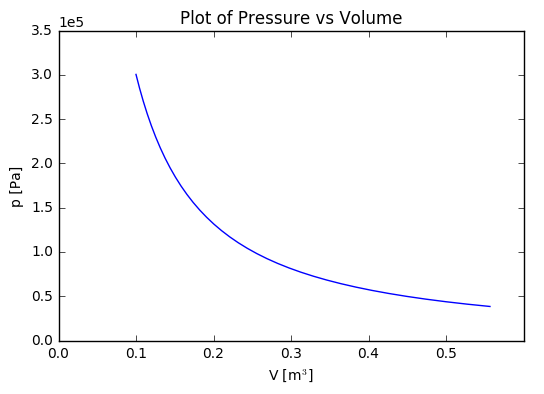

In [7]:
# Plot the graph using matplotlib
plt.plot(V, p)

# Add labels and title
plt.xlabel("V [m$^3$]")
plt.ylabel("p [Pa]")
plt.title("Plot of Pressure vs Volume")

# Set limits for the x-axis to make it look better
plt.xlim([0.0, 0.6])

# Introduce scientific notation numbering on the y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));

To solve the last part of the question we will use the pre-calculated value of n = 1.1963. We will calculate the pressure ($p_{v}$) for the volume array treating the assumption $pV^{n}= \text{const}.$ as true, which leads to the expression $p = p_{1} \left(V_{1}/V \right)^{n}$. We then find when the difference between the two pressures is the greatest. 

In [8]:
# Introduce n
n = 1.1963

# Create a new pressure array calculated using pVⁿ = const. 
pv = 300000*(V1/V)**n

# Find the maximum difference as a percent value
pmax = 100*np.amax((p-pv)/p)
print("Maximum difference using this approach is {:.4}%".format(pmax))

Maximum difference using this approach is 0.7697%


We can also create a graph with both of the plots.

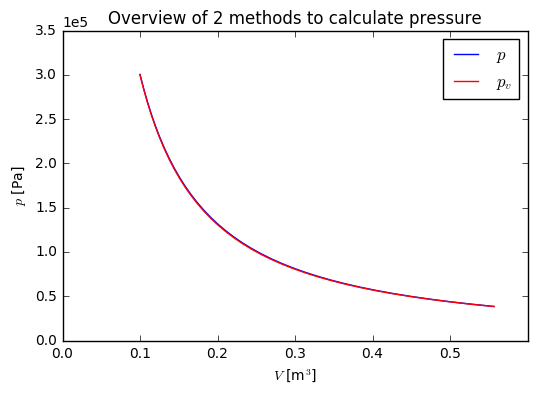

In [9]:
# Plot the graph using matplotlib
plt.plot(V, p, "b-", V, pv, "r-")

# Add labels
plt.xlabel("$V$ [m$^3$]")
plt.ylabel("$p$ [Pa]")
plt.title("Overview of 2 methods to calculate pressure")

# Add legend
plt.legend(["$p$", "$p_v$"])

# Set limits for the x-axis to make it look better
plt.xlim([0.0, 0.6])

# Introduce scientific notation numbering on the y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));

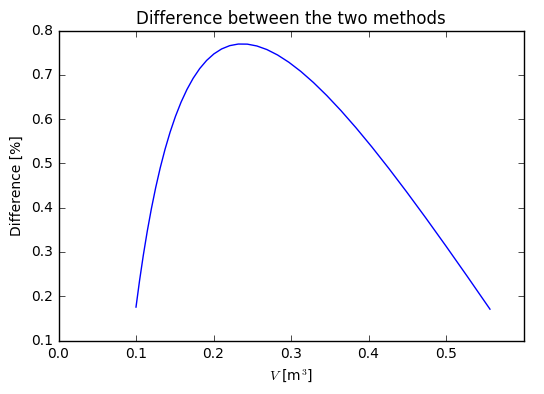

In [10]:
# Plot the graph using matplotlib
plt.plot(V, 100*(p-pv)/p)

# Add labels
plt.xlabel("$V$ [m$^3$]")
plt.ylabel("Difference [%]")
plt.title("Difference between the two methods")

# Set limits for the y-axis to make it look better
plt.xlim([0.0, 0.6]);